In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.' ,untar=True)

In [3]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
img_count=len(list(data_dir.glob('*/*.jpg')))
img_count

835

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

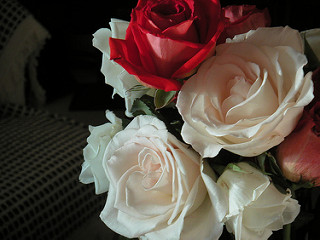

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
sunflowers=list(data_dir.glob('sunflowers/*'))
sunflowers[:5] 

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/11881770944_22b4f2f8f6_n.jpg')]

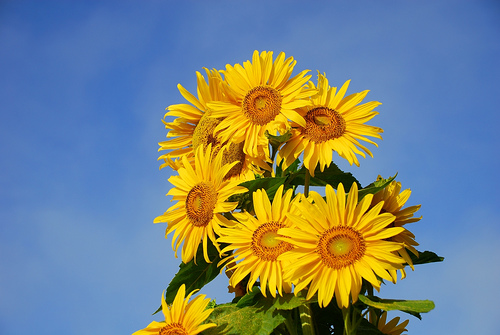

In [9]:
PIL.Image.open(str(sunflowers[8]))

In [10]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*'))
}

In [11]:
flowers_labels_dict={
    'roses': 0,
    'sunflowers':1
}

In [12]:
str(flowers_images_dict[ 'roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img=cv2.imread(str(flowers_images_dict[ 'roses'][0]))
img.shape

(240, 179, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
 print(flower_name)
 print(len(images))

roses
641
sunflowers
194


In [16]:
for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
x_train_scaled=x_train/255
y_train_scaled=y_train/255

In [20]:
num_classes=2
model= Sequential([
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(138,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.9869 - loss: 0.2846
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 620ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 536ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 545ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [21]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

In [23]:
predictions=model.predict(x_train_scaled)
predictions

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


array([[-212.53174,  225.04352],
       [-131.02312,  138.73346],
       [-164.36806,  174.19159],
       [-230.05429,  243.88763],
       [-205.81096,  217.89723],
       [-233.81534,  247.41238],
       [-223.75085,  236.99948],
       [-228.7124 ,  241.96307],
       [-223.0057 ,  236.10551],
       [-204.65927,  216.77644],
       [-252.09488,  266.8987 ],
       [-248.66853,  263.44562],
       [-251.7897 ,  266.77   ],
       [-228.78598,  242.16924],
       [-198.6653 ,  210.35435],
       [-201.54398,  213.32202],
       [-254.79512,  269.9608 ],
       [-187.01266,  198.27013],
       [-260.0931 ,  275.27075],
       [-256.03522,  270.54044],
       [-257.38773,  272.4451 ],
       [-246.18942,  260.62582],
       [-201.35953,  213.2133 ],
       [-266.65762,  282.1795 ],
       [-225.12112,  238.38141],
       [-240.2052 ,  254.67938],
       [-239.69818,  254.16373],
       [-215.51413,  228.44682],
       [-267.93423,  283.78452],
       [-284.471  ,  301.12793],
       [-1

In [33]:
score=tf.nn.softmax(predictions[6])
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>

In [25]:
np.argmax(score)

1

In [32]:
y_test[6]

1

In [48]:
y_test.shape

(49,)

IndexError: index 234 is out of bounds for axis 0 with size 194

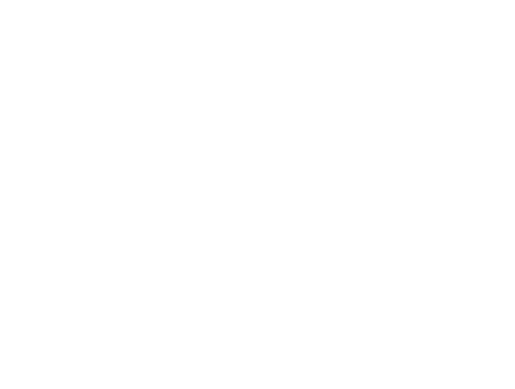

In [47]:
plt.axis('off')
plt.imshow(x[])